# Part I - Loan Dataset Exploration
## by Davit Lomadze

## Introduction

Dataset provides information about loan. Dataset contains detailed information about loans and borrowers. Dataset contains both qualitative and quantitative measurements.Data contains 81 measurements and 113,937 observations.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Shape of dataframe
loan_df.shape

(113937, 81)

In [4]:
# info about data structure
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# list of columns
col_list = list(loan_df.columns)
col_list

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [7]:
# format count of variables
data_formats = loan_df.dtypes.value_counts()
print(data_formats)

float64    50
object     17
int64      11
bool        3
dtype: int64


In [8]:
data_formats.index

Index([float64, object, int64, bool], dtype='object')

### What is the structure of your dataset?

The dataset has 81 columns and 113,937 rows. Dataset provides information about loans, when was is taken, by whom, how much, APR (Annual Percentage Rate, loan status (current, completed, defaulted and so on), monthly payments, income of the borrower, oustanding debts of the borrower, when was loan taken, period of the loan, when it finishes and list goes on.
Out of 81, format of 50 variables are float, string - 17, integer - 11 and boolean - 3.

### What is/are the main feature(s) of interest in your dataset?

Main question is what should borrower expect what his/her APR will be. For this reason main feature will be `BorrowerAPR`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Next features will help my investigation: LoanStatus, IncomeRange and DebtToIncomeRatio. Additional measurements will be used, like term, APR (annual percentage rate), occupation, employment status, credit score, income range, income verifiable, debt to income ratio. States of where borrowers live will be used, if APR is different by states and what is the rate of complete loans. Listing key is unique code for each observation, which will help us discover duplicates. This will be loans that were taken by same person on different occasions. This also will serve purpose of how will past loan affected the future one.

## Univariate Exploration

In [9]:
# Features of interest

col_int = ['ListingKey', 'Term', 'BorrowerAPR', 'BorrowerState', 
           'Occupation', 'EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
           'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio']

# copy of the main dataframe, but only with features of interest
loan_df_copy = loan_df[col_int].copy()

In [10]:
# general info about dataset copy
loan_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingKey               113937 non-null object
Term                     113937 non-null int64
BorrowerAPR              113912 non-null float64
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
CreditScoreRangeLower    113346 non-null float64
CreditScoreRangeUpper    113346 non-null float64
IncomeRange              113937 non-null object
IncomeVerifiable         113937 non-null bool
DebtToIncomeRatio        105383 non-null float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 8.8+ MB


#### `Listingkey` exploration

Analysis of ListingKey should reveal whether theory about duplicates being seperate observations of same borrower.

In [11]:
# Listingkey exploration

print('number of unique values - ' + str(loan_df_copy['ListingKey'].nunique()))
print('number of duplicates - ' + str(loan_df_copy.ListingKey.duplicated().sum()))

loan_df_copy[loan_df_copy.ListingKey.duplicated(False)].sort_values(by='ListingKey')

number of unique values - 113066
number of duplicates - 871


,ListingKey,Term,BorrowerAPR,BorrowerState,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,DebtToIncomeRatio
32680,00223594917038064A7C947,36,0.23540,NY,Other,Employed,660.0,679.0,"$25,000-49,999",True,0.42
32681,00223594917038064A7C947,36,0.23540,NY,Other,Employed,660.0,679.0,"$25,000-49,999",True,0.42
32964,00473590513960687DD308F,60,0.22242,TX,Nurse (RN),Employed,660.0,679.0,"$100,000+",True,0.31
17274,00473590513960687DD308F,60,0.22242,TX,Nurse (RN),Employed,660.0,679.0,"$100,000+",True,0.31
7478,0098360461900952056DB93,36,0.29660,VA,Professional,Employed,640.0,659.0,"$75,000-99,999",True,0.30
33220,0098360461900952056DB93,36,0.29660,VA,Professional,Employed,640.0,659.0,"$75,000-99,999",True,0.30
27677,01163604029146842E28D9C,36,0.31975,NE,Other,Employed,680.0,699.0,"$25,000-49,999",True,0.42
788,01163604029146842E28D9C,36,0.31975,NE,Other,Employed,680.0,699.0,"$25,000-49,999",True,0.42
27360,014F35910923350802E1B29,60,0.19323,WA,Executive,Employed,660.0,679.0,"$75,000-99,999",True,0.10
18324,014F35910923350802E1B29,60,0.19323,WA,Executive,Employed,660.0,679.0,"$75,000-99,999",True,0.10


In [12]:
# For creating of pie chart of share of duplicates in total data

duplicats_in_keys = loan_df_copy.ListingKey.duplicated(False).sum()
unique_in_keys = len(loan_df_copy.ListingKey) - duplicats_in_keys

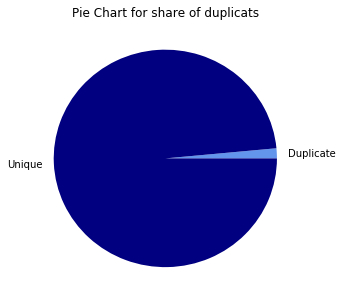

In [13]:
# pie chart for share of duplicates within ListingKey

plt.figure(figsize=(5,5))
plt.pie([duplicats_in_keys, unique_in_keys], labels=['Duplicate', 'Unique'], colors=['cornflowerblue', 'navy'])
plt.title('Pie Chart for share of duplicats');

Visual exploration showed, that `ListingKey` column contains duplicated values, that is simply an entry error and they will be dropped.

In [14]:
# dropping duplicated values from `ListingKey` column

loan_df_copy.drop_duplicates('ListingKey', inplace=True)

#### `Term` exploration

Exploring `Term` should reveal the distribution of how much are each of the terms.

total number of values - 113066

Value Counts
36    87224
60    24228
12     1614
Name: Term, dtype: int64


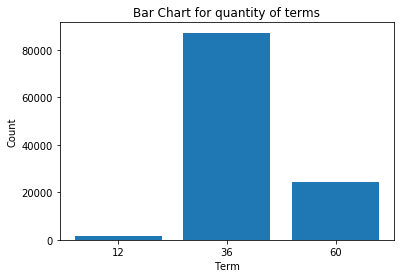

In [15]:
# value counts for `Term` column

term_count = loan_df_copy.Term.value_counts()

print('total number of values - ' + str(len(loan_df_copy.Term)))
print('')
print('Value Counts')
print(term_count)

plt.bar(x = ['36', '60', '12'], height = term_count.values)
plt.ylabel('Count')
plt.xlabel('Term')
plt.title('Bar Chart for quantity of terms');

`Term` column exploration reveald, that borrowers mostly take 36 month (3 year) loan. The least demanded term of a loan is 12 months (1 year) with only 1,614 borrows, which is approximetely 1% of total quantity. Next analysis might reduce the size of 12 month loans even more and it will reveal whether this term should be dropped all together or not.

#### `BorrowerAPR` Exploration

`BorrowerAPR` will help us understand how APR is distributed. 

In [16]:
# programatic analysis of the data
print('format - ' + str(loan_df_copy.BorrowerAPR.dtype))
print('shape - ' + str(loan_df_copy.BorrowerAPR.shape[0]))
print('null values - ' + str(loan_df_copy.BorrowerAPR.isnull().sum()))

format - float64
shape - 113066
null values - 25


There are 25 null values under `BorrowerAPR` column. They need to be dropped.

In [17]:
# dropping null values

loan_df_copy.dropna(subset=['BorrowerAPR'], inplace=True)
loan_df_copy.reset_index(drop=True, inplace=True)

In [18]:
# general description of BorrowerAPR

loan_df_copy.BorrowerAPR.describe()

count    113041.000000
mean          0.218980
std           0.080483
min           0.006530
25%           0.156290
50%           0.209840
75%           0.283860
max           0.512290
Name: BorrowerAPR, dtype: float64

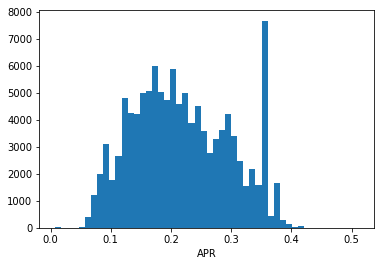

In [19]:
# plot histogram

plt.hist(data = loan_df_copy, x = 'BorrowerAPR', bins=50)
plt.xlabel('APR')
plt.show();

In [20]:
# mode APR
print('mode APR - ' + str(loan_df_copy.BorrowerAPR.mode()[0]))
loan_df_copy[loan_df_copy.BorrowerAPR == loan_df_copy.BorrowerAPR.mode()[0]].shape[0]

mode APR - 0.35797


3672

In [21]:
# look for what is the same
same_apr = loan_df_copy[loan_df_copy.BorrowerAPR == loan_df_copy.BorrowerAPR.mode()[0]]

same_apr.Term.unique()

array([36])

Histogram revealed outliner. The outliner is mode of 0.35797. Only similarity all the loans with such APR is Term of 36 months. More details will be revealed during bivariant and multivariant explorations.

#### `BorrowerState` Exploration

Exploring  which state is represented most

In [22]:
#check for missing data

check_null = loan_df_copy[loan_df_copy.BorrowerState.isnull()]
check_null

,ListingKey,Term,BorrowerAPR,BorrowerState,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,DebtToIncomeRatio
10,0F1734025150298088A5F2B,36,0.15033,NaN,Waiter/Waitress,Full-time,640.0,659.0,"$1-24,999",True,0.27000
16,0FDF336575182398852A8DC,36,0.13202,NaN,Professional,Not available,760.0,779.0,Not displayed,True,0.12000
38,109D3366077649289619396,36,0.15211,NaN,NaN,NaN,680.0,699.0,Not displayed,True,0.06000
41,10AD33803102786533722BB,36,0.30300,NaN,Other,Not available,520.0,539.0,Not displayed,True,0.27000
67,0F2F338417457873000F9A3,36,0.21554,NaN,Nurse's Aide,Full-time,580.0,599.0,"$25,000-49,999",True,0.45000
89,0FC333723307531761A7001,36,0.19178,NaN,Clerical,Not available,600.0,619.0,Not displayed,True,0.13000
91,0FE433661215082408720F0,36,0.08292,NaN,NaN,NaN,820.0,839.0,Not displayed,True,0.08000
112,10CB3381860531415ABCC0F,36,0.30564,NaN,Other,Self-employed,520.0,539.0,"$50,000-74,999",True,0.04000
121,119633661542644610A5AD7,36,0.08718,NaN,Other,Not available,720.0,739.0,Not displayed,True,0.13000
145,34B03365511229087456DB5,36,0.09939,NaN,NaN,NaN,740.0,759.0,Not displayed,False,0.07000


In [25]:
# observations with null values under BorrowerState

check_null.BorrowerState.isna().sum()

5490

`BorrowerState` contains null values. We need to drop these observations because there is no way to identify states and keeping null values is not an option. State will be important for multivariant explorations.

In [26]:
# drop null values under BorrowerState

loan_df_copy.dropna(subset=['BorrowerState'], inplace=True)

In [27]:
# value counts for BorrowerState

state_count = loan_df_copy.BorrowerState.value_counts()

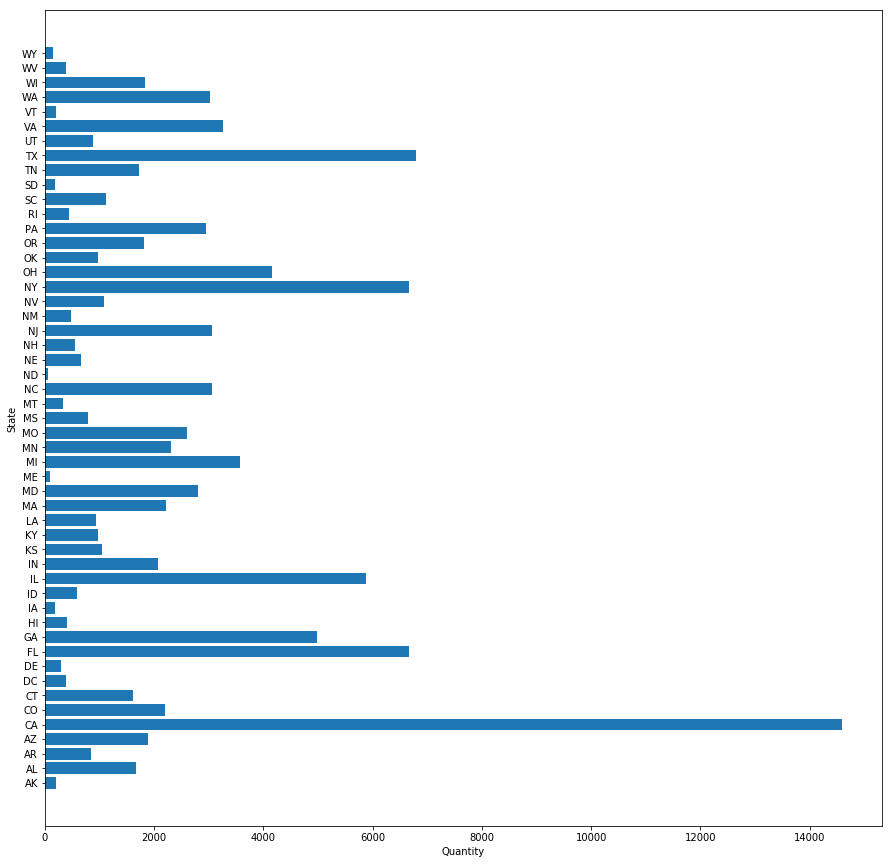

In [28]:
# plot bar chart for quantities of borrowers by state

plt.figure(figsize=(15,15))
plt.barh(y = state_count.index.values, width = state_count.values)
plt.xlabel('Quantity')
plt.ylabel('State');

In [29]:
# overall description of given states

state_count.describe()

count       51.000000
mean      2108.843137
std       2532.404110
min         52.000000
25%        450.500000
50%       1109.000000
75%       2872.000000
max      14594.000000
Name: BorrowerState, dtype: float64

The number of observations for 75% of the states is below 2,802. Meaning, during multivariant exploration it will be more usefull to group the 75% of states under one group and seperately for the rest 25%. The most of the observations are for CA. If we do not group, CA alone might influence the overall analysis result and grouping will help us balance things out.  

#### `Occupation` Exploration

We will explore occupation of borrowers. We will see, which proffesion is mostly asking for loans.

In [30]:
# quantity of null values
loan_df_copy.Occupation.isnull().sum()

2142

In [31]:
# value counts under Occupation column

loan_df_copy.Occupation.value_counts()

Other                                 27292
Professional                          13025
Computer Programmer                    4207
Executive                              4158
Teacher                                3619
Administrative Assistant               3536
Analyst                                3462
Sales - Commission                     3224
Accountant/CPA                         3107
Clerical                               2931
Sales - Retail                         2664
Skilled Labor                          2651
Retail Management                      2477
Nurse (RN)                             2434
Construction                           1725
Truck Driver                           1622
Police Officer/Correction Officer      1521
Laborer                                1518
Civil Service                          1406
Engineer - Mechanical                  1356
Food Service Management                1204
Military Enlisted                      1192
Food Service                    

For occupation we won't be dropping rows. Null values will be replaced with 'Other', since there is such option.

In [32]:
# replace null values with 'Other'

loan_df_copy.Occupation.fillna('Other', inplace=True)

Visual analysis revealed that there are same occupations but with different branches, which are seperated with "-" symbol. These extra branches are not necessary for this analysis and will be removed from the string value.

In [33]:
# using pattern retrieve values that have branches
pattern = "(\w+\s\W\s\w+)"

len(loan_df_copy[loan_df_copy.Occupation.str.contains(pat=pattern)])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


10927

In [34]:
# split values by " - " 
occupation = []

for s in loan_df_copy.Occupation.str.split(pat=' - '):
    occupation.append(s[0])

loan_df_copy.Occupation = occupation

# test if such values remain
print(len(loan_df_copy[loan_df_copy.Occupation.str.contains(pat=pattern)]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


0


In [35]:
# plot Occupation value counts

loan_df_copy.Occupation.value_counts()

Other                                29434
Professional                         13025
Sales                                 5888
Computer Programmer                   4207
Executive                             4158
Teacher                               3619
Administrative Assistant              3536
Analyst                               3462
Accountant/CPA                        3107
Clerical                              2931
Engineer                              2657
Skilled Labor                         2651
Retail Management                     2477
Nurse (RN)                            2434
Construction                          1725
Truck Driver                          1622
Tradesman                             1582
Police Officer/Correction Officer     1521
Laborer                               1518
Civil Service                         1406
Food Service Management               1204
Military Enlisted                     1192
Food Service                          1091
Medical Tec

There seems to be left same problem with Nurses. Further exploring will reveal if the same pattern is for other professions as well.

In [36]:
# testing if only Nurse has specifications
loan_df_copy[loan_df_copy.Occupation.str.contains(pat="(\s\W\w+\W)")]['Occupation'].unique()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


array(['Nurse (RN)', 'Nurse (LPN)'], dtype=object)

In [37]:
# remove parenthecies and words in between them

loan_df_copy.Occupation = loan_df_copy.Occupation.str.replace(pat="(\s\W\w+\W)", repl='')

In [38]:
# value count for occupations

occupation_count = loan_df_copy.Occupation.value_counts()

occupation_count

Other                                29434
Professional                         13025
Sales                                 5888
Computer Programmer                   4207
Executive                             4158
Teacher                               3619
Administrative Assistant              3536
Analyst                               3462
Accountant/CPA                        3107
Clerical                              2931
Nurse                                 2914
Engineer                              2657
Skilled Labor                         2651
Retail Management                     2477
Construction                          1725
Truck Driver                          1622
Tradesman                             1582
Police Officer/Correction Officer     1521
Laborer                               1518
Civil Service                         1406
Food Service Management               1204
Military Enlisted                     1192
Food Service                          1091
Medical Tec

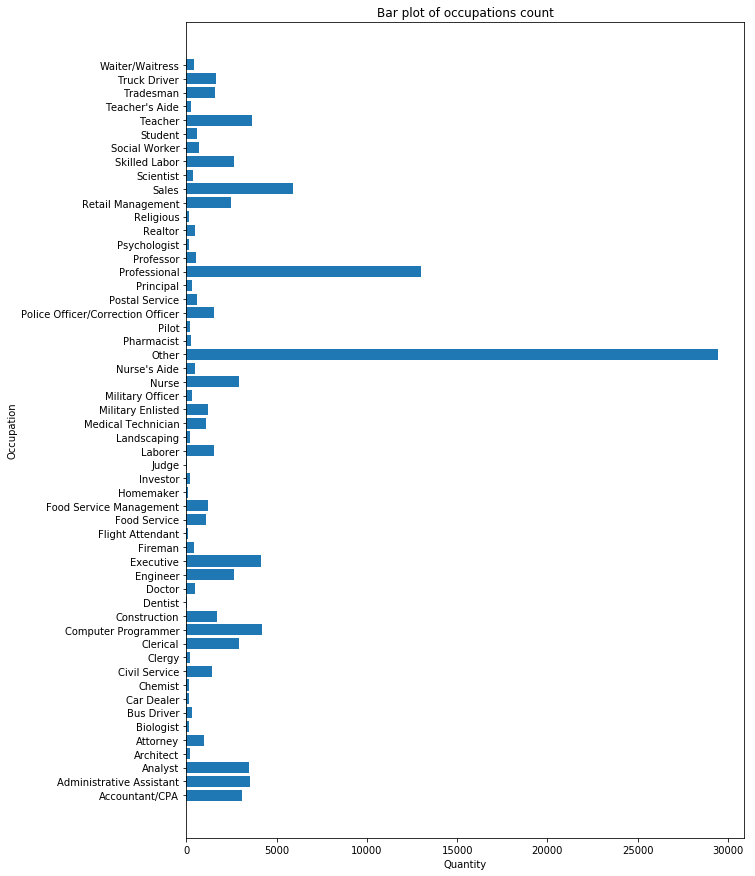

In [39]:
# plot bar for occupations

plt.figure(figsize=(10, 15))
plt.barh(y = occupation_count.index, width = occupation_count.values)
plt.title('Bar plot of occupations count')
plt.xlabel('Quantity')
plt.ylabel('Occupation');

For future analysis these many categories will be unreadable, because of this reason, it is better to keep the occupations, which have quantity above 75 percentile, the rest will be grouped as `other`.

In [40]:
# above 75 percentile
occupation_count[occupation_count > np.percentile(occupation_count, 75)]

Other                       29434
Professional                13025
Sales                        5888
Computer Programmer          4207
Executive                    4158
Teacher                      3619
Administrative Assistant     3536
Analyst                      3462
Accountant/CPA               3107
Clerical                     2931
Nurse                        2914
Engineer                     2657
Skilled Labor                2651
Retail Management            2477
Name: Occupation, dtype: int64

In [41]:
# replace occupation with "other" if quantity is less than 75 percentile

unique_oc = loan_df_copy.Occupation.unique()

for oc in unique_oc:
    
    if loan_df_copy[loan_df_copy.Occupation == oc].shape[0] < np.percentile(occupation_count, 75):
        loan_df_copy.Occupation = loan_df_copy.Occupation.str.replace(oc, 'Other')

In [42]:
# check the result
loan_df_copy.Occupation.value_counts()

Other                       51715
Professional                13025
Sales                        5888
Computer Programmer          4207
Executive                    4158
Teacher                      3619
Administrative Assistant     3536
Analyst                      3462
Accountant/CPA               3107
Clerical                     2931
Nurse                        2914
Engineer                     2657
Skilled Labor                2651
Retail Management            2477
Other Management             1204
Name: Occupation, dtype: int64

#### `EmploymentStatus` exploration

Exploring employment status dataset for missing data and distribution.

In [43]:
# Check for null values

loan_df_copy.EmploymentStatus.isnull().sum()

868

There are 867 null values. These values can't be replaced and should be dropped.

In [44]:
# drop missing values

loan_df_copy.dropna(subset=['EmploymentStatus'], inplace=True)

# Test if the null values got deleted

loan_df_copy.EmploymentStatus.isnull().sum()

0

In [45]:
# value counts

loan_df_copy.EmploymentStatus.value_counts()

Employed         66598
Full-time        24872
Self-employed     5947
Other             3742
Not available     2959
Part-time         1002
Not employed       801
Retired            762
Name: EmploymentStatus, dtype: int64

#### `CreditScoreRangeLower` and `CreditScoreRangeUpper` exploration

Even though this is univariant exploration, these two features will be explored together. We will check how they are distributed, but not reletion between these two.

In [46]:
# check for null

print(loan_df_copy.CreditScoreRangeLower.isnull().sum())
print(loan_df_copy.CreditScoreRangeUpper.isnull().sum())

0
0


In [47]:
# describe credit scores

print(loan_df_copy.CreditScoreRangeLower.describe())

print('')

print(loan_df_copy.CreditScoreRangeUpper.describe())

count    106683.000000
mean        689.407497
std          61.396700
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

count    106683.000000
mean        708.407497
std          61.396700
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64


In [48]:
# number of values less than 300 under both credit scores

loan_df_copy[loan_df_copy['CreditScoreRangeLower'] < 300].shape[0]

loan_df_copy[loan_df_copy['CreditScoreRangeUpper'] < 300].shape[0]

69

There are some values below 300. The [minimum rating](https://www.americanexpress.com/en-us/credit-cards/credit-intel/credit-score-ranges/) in US is 300. Thus values less than 300 will be dropped.

In [49]:
# drop credit ratings less than 300
loan_df_copy.drop(loan_df_copy[loan_df_copy['CreditScoreRangeLower'] < 300].index, inplace=True)

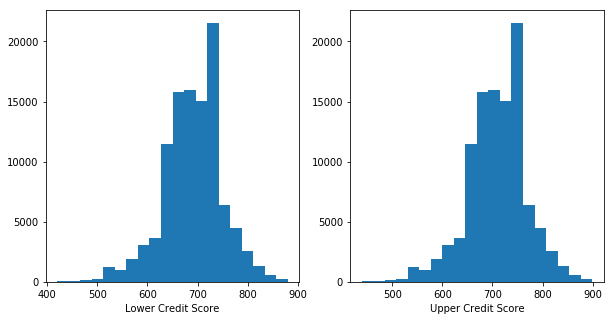

In [50]:
# plot distribution for lower and upper credit scores


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = loan_df_copy.CreditScoreRangeLower.values, bins=20)
plt.xlabel('Lower Credit Score');

plt.subplot(1,2,2)
plt.hist(x = loan_df_copy.CreditScoreRangeUpper.values, bins=20)
plt.xlabel('Upper Credit Score');

In [51]:
# mode of these features

print('lower: ' + str(loan_df_copy.CreditScoreRangeLower.mode()[0]))
print('upper: ' + str(loan_df_copy.CreditScoreRangeUpper.mode()[0]))

lower: 680.0
upper: 699.0


Both distributions of lower and upper range are similar in shape. For the sake of tidiness upper and lower ranges will be replaced with middle point of these two.

In [52]:
# adding column with upper and lower ranges' mid point

loan_df_copy['CreditScore'] = (loan_df_copy.CreditScoreRangeUpper + loan_df_copy.CreditScoreRangeLower) / 2

# drop CreditRangeLower and CreditRangeUpper

loan_df_copy.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True)

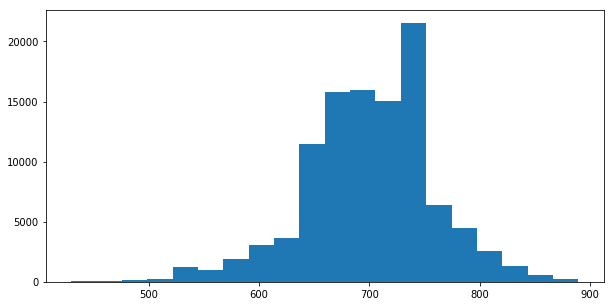

In [53]:
# plot histogram

plt.figure(figsize=(10,5))
plt.hist(data=loan_df_copy, x = 'CreditScore', bins=20)
plt.show();

In [54]:
loan_df_copy.CreditScore.describe()

count    106614.000000
mean        699.353678
std          58.857388
min         429.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

#### `IncomeRamge` exploration

`IncomeRange` exploration will help find which income range is most prevelent.

In [55]:
# check for null values

loan_df_copy.IncomeRange.isnull().sum()

0

Not employed probably should be same as 0$ income. Otherwise if they received money from someone, would have some kind of income. `Not employed` will be replaced with `$0`.

In [56]:
# replace not employed with $0

loan_df_copy.IncomeRange.replace('Not employed', '$0', inplace=True)

loan_df_copy[loan_df_copy['IncomeRange'] == 'Not employed']

,ListingKey,Term,BorrowerAPR,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,CreditScore


In [57]:
# value counts
inc_range_count = loan_df_copy.IncomeRange.value_counts()
inc_range_count

$25,000-49,999    31268
$50,000-74,999    30337
$100,000+         17026
$75,000-99,999    16601
$1-24,999          7007
Not displayed      2991
$0                 1384
Name: IncomeRange, dtype: int64

In [58]:
# put values in order
x = ['Not displayed',
 '$0',
 '$1-24,999',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999',
 '$100,000+']

y = [3838, 1354, 6841, 30534, 29696, 16267, 16670]

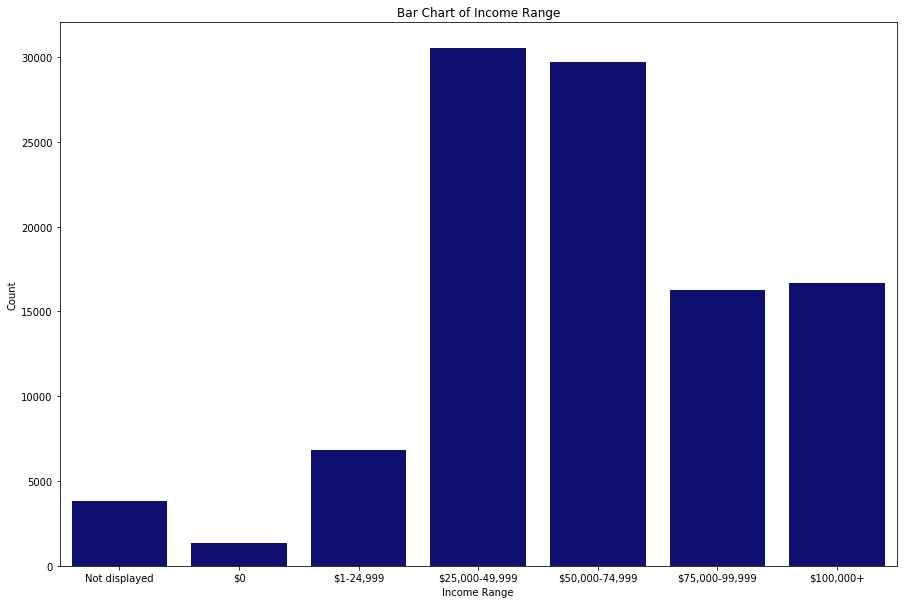

In [59]:
# plot income range in order

plt.figure(figsize=(15,10))
sb.barplot(x = x, y = y, color='navy')
plt.ylabel('Count')
plt.xlabel('Income Range')
plt.title('Bar Chart of Income Range');

Most common income ranges are $25,000-49,999 and $50,000-74,999.

#### `IncomeVerifiable` exploration

In [60]:
# check for null values

loan_df_copy.IncomeVerifiable.isnull().sum()

0

In [61]:
# value count of `IncomeVerifiable`

inc_verify_count = loan_df_copy.IncomeVerifiable.value_counts()
inc_verify_count

True     98170
False     8444
Name: IncomeVerifiable, dtype: int64

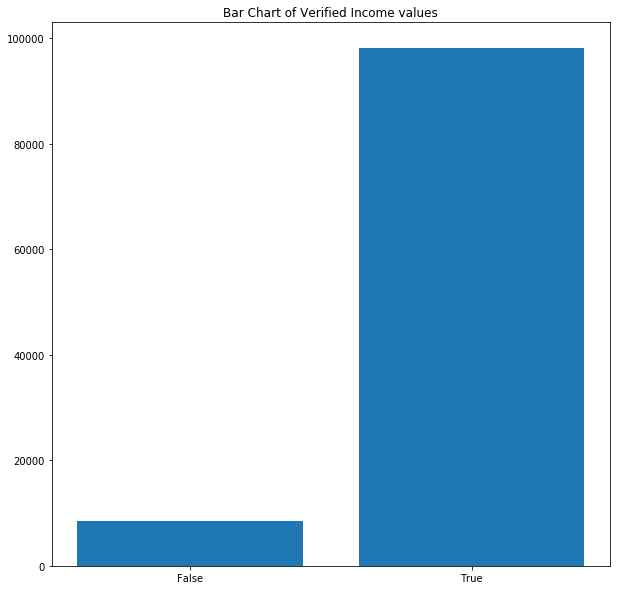

In [62]:
# bar plot of `IncomeVerifiable`

plt.figure(figsize=(10, 10))
plt.bar(x = ['True', 'False'], height = inc_verify_count.values)
plt.title('Bar Chart of Verified Income values');

#### `DebtToIncomeRatio` exploration

Exploring what is distribution of debt to income ratio.

In [63]:
# check for null values

loan_df_copy.DebtToIncomeRatio.isnull().sum()

8355

In [64]:
loan_df_copy[loan_df_copy.DebtToIncomeRatio.isnull()]

,ListingKey,Term,BorrowerAPR,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,CreditScore
39,10A43601079743929992413,60,0.19630,WA,Other,Self-employed,"$100,000+",False,NaN,689.5
68,0F37360159310530849DA23,60,0.13636,IL,Other,Self-employed,"$25,000-49,999",False,NaN,709.5
77,0DFE3425061927556BB8A75,36,0.18454,CA,Other,Full-time,$0,False,NaN,729.5
99,0F67356860455769574096F,36,0.35356,CA,Other,Not employed,$0,False,NaN,729.5
102,0F843543787869030F017F8,36,0.26681,CO,Other,Self-employed,"$50,000-74,999",False,NaN,689.5
104,0F873523720624525E00B20,36,0.30532,WI,Sales,Employed,"$25,000-49,999",False,NaN,649.5
107,10C034203841683992703F1,36,0.28320,GA,Executive,Full-time,$0,False,NaN,649.5
124,10EC3516168266498E5E38A,36,0.35643,NC,Other,Not employed,$0,False,NaN,649.5
130,11193430644352832E11281,36,0.20623,SC,Other,Part-time,"$1-24,999",False,NaN,749.5
169,34D1354489785280859E146,36,0.28851,FL,Other,Not employed,$0,False,NaN,769.5


Quantity of null values under `DebtToIncomeRatio`

In [65]:
# drop null values

loan_df_copy.dropna(subset=['DebtToIncomeRatio'], inplace=True)

loan_df_copy.DebtToIncomeRatio.isnull().sum()

0

In [66]:
# describe the debt to income ratio

loan_df_copy.DebtToIncomeRatio.describe()

count    98259.000000
mean         0.273945
std          0.508851
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

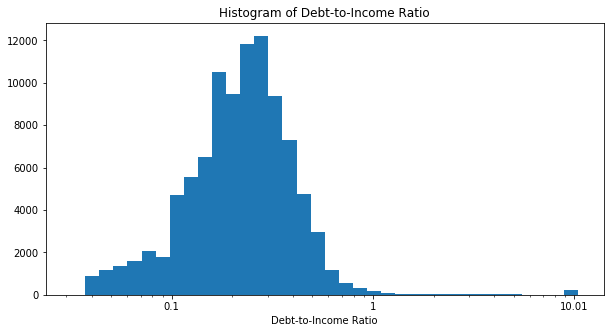

In [67]:
# long tail, log scale used

bin_size = 0.07
bins = 10 ** np.arange(-1.5, np.log10(loan_df_copy.DebtToIncomeRatio.max()) + bin_size, bin_size)

plt.figure(figsize=(10,5))
plt.hist(data=loan_df_copy, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Histogram of Debt-to-Income Ratio')
plt.xscale('log')
plt.xticks([10**-1, 10**0, 10**1], [0.1, 1, 10.01])
plt.xlabel('Debt-to-Income Ratio')
plt.show();

75% of the ratios are below 0.32. Histogram is skewed right. 25% had significant impact to push mean higher than median.

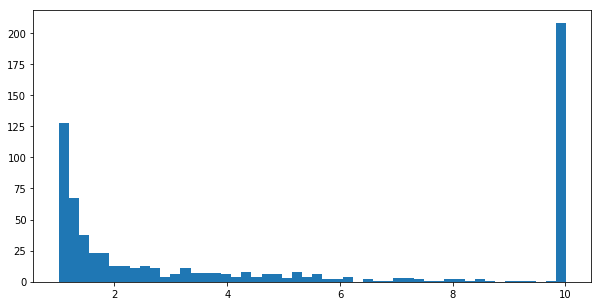

In [68]:
# histogram of Debt-to-Income ratio above 1
above_one = loan_df_copy[loan_df_copy.DebtToIncomeRatio > 1]

plt.figure(figsize=(10,5))
plt.hist(data = above_one, x = above_one.DebtToIncomeRatio, bins = 50)
plt.show();

In [69]:
# size of ratios above 1
above_one.shape[0]

679

Even though Debt-to-Income ratios above 1 are outliner, they do make sanse, because it can be caused when debt is more than income and ratio being 10 is also possible. This values don't require dropping or changing.

#### After cleaning up data, borrower apr needs to be checked once again.

In [70]:
# borrower apr overview
loan_df_copy.BorrowerAPR.describe()

count    98259.000000
mean         0.217845
std          0.080130
min          0.006530
25%          0.155380
50%          0.208080
75%          0.281290
max          0.423950
Name: BorrowerAPR, dtype: float64

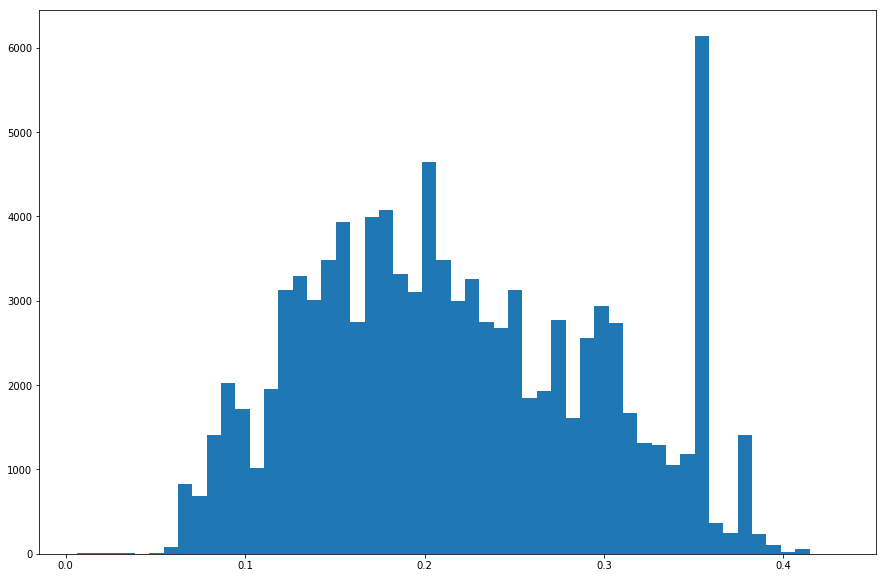

In [71]:
# plot histogram

plt.figure(figsize=(15,10))
bins = np.arange(loan_df_copy.BorrowerAPR.min(), loan_df_copy.BorrowerAPR.max()+0.008, 0.008)
plt.hist(data = loan_df_copy, x = 'BorrowerAPR', bins=bins);

In [72]:
# visual overview

apr_overview = loan_df_copy[loan_df_copy.BorrowerAPR == loan_df_copy.BorrowerAPR.mode()[0]]
apr_overview

,ListingKey,Term,BorrowerAPR,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,CreditScore
14,0F483544120452347F48121,36,0.35797,FL,Other,Other,"$50,000-74,999",True,0.49,709.5
30,0F683558129866945165D36,36,0.35797,WI,Other,Other,"$25,000-49,999",True,0.04,689.5
70,0DD23561917467486206661,36,0.35797,CA,Other,Employed,"$25,000-49,999",True,0.53,769.5
93,0FEE354060248231998406E,36,0.35797,MO,Other,Employed,"$50,000-74,999",True,0.43,709.5
106,10BE354254173728633D033,36,0.35797,OH,Administrative Assistant,Employed,"$25,000-49,999",True,0.54,729.5
111,10CA35440888969597C16BF,36,0.35797,AL,Other,Employed,"$25,000-49,999",True,0.45,749.5
156,108C3556447927451623836,36,0.35797,NY,Other,Employed,"$25,000-49,999",True,0.20,689.5
211,10F6354243629494192E867,36,0.35797,OK,Professional,Employed,"$25,000-49,999",True,0.26,669.5
264,101F35507532151104C0F0D,36,0.35797,CO,Retail Management,Employed,"$25,000-49,999",True,0.29,689.5
265,1023354737099538398D0DE,36,0.35797,VA,Other,Employed,"$25,000-49,999",True,0.20,689.5


In [73]:
# checking for similarities under IncomeVerifiable and EmploymentStatus columns

print(apr_overview.IncomeVerifiable.value_counts())
print('')
print(apr_overview.EmploymentStatus.value_counts())

True    2990
Name: IncomeVerifiable, dtype: int64

Employed     2676
Other         257
Full-time      49
Retired         8
Name: EmploymentStatus, dtype: int64


With data cleaning, IncomeVerifiable is left True. Other than that there is no noticeable pattern or error.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most noticeable outliner was in BorrowerAPR variable. Mode APR is 0.35797 and term for such loans is 36 months. There was no noticeable error, thus no transformation was made.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

`BorrowerAPR` and `DebtToIncomeRatio` contained null values, that were removed. Also, `CreditScoreLower` and `CreditScoreUpper` contained values below 300, which is not possible, because minimum rating in US is 300. Thus, values below 300 were dropped.

## Bivariate Exploration

In [74]:
numeric = ['Term', 'BorrowerAPR', 'DebtToIncomeRatio', 'CreditScore']

categorical = ['Occupation', 'EmploymentStatus', 'IncomeRange', 'IncomeVerifiable']

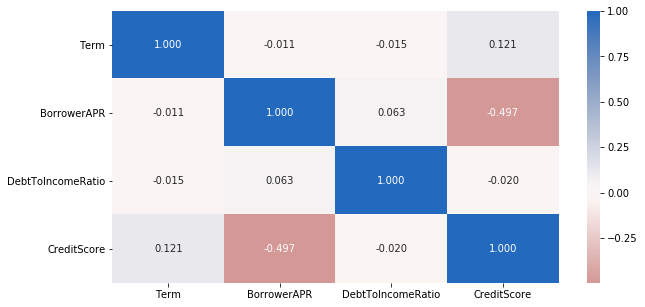

In [75]:
# correlation among numeric values

plt.figure(figsize=(10,5))

sb.heatmap(loan_df_copy[numeric].corr(), annot = True, cmap = 'vlag_r', fmt='.3f', center = 0)
plt.show();

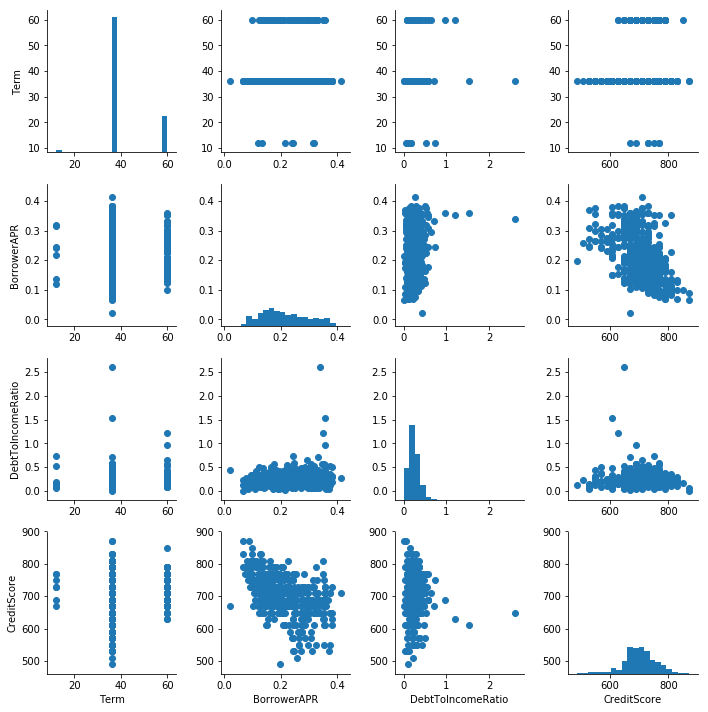

In [76]:
# plot from sample plots

loan_df_samp = loan_df_copy.sample(n=500, replace=False)

g = sb.PairGrid(data = loan_df_samp, vars = numeric)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter);

`Term`, `CreditScore` and `DebttoIncomeRatio` seem to have very low correlation with `BorrowerAPR`. There is no evidence that term and debt to income ratio affects APR. The calculation of APR consists of loan [term](https://www.investopedia.com/terms/a/apr.asp), thus term not having effect on APR doesn't seem logical. There could be other influencing factors, that could have affect together with DebtToIncomeRatio and Term.

Regardless, the direction of the correlation is logical. Term to BorrowerAPR correlation is negative, meaning the less the Term is, the higher APR gets, which makes sense if we judge by the equation. In case of DebtToIncomeRatio, correlation is positive, because high ratio means increased risk of not being able to pay the loan, thus higher APR. In case of CreditScore, also lower the credit score the higher is the risk, thus higher APR.

#### Comparing with categorical values

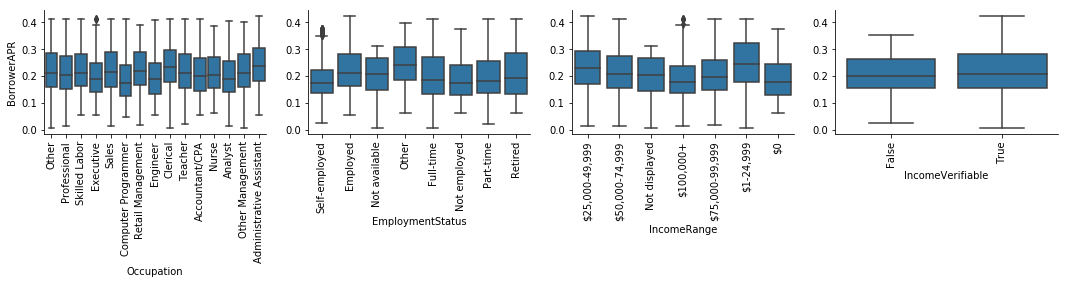

In [77]:
# plot matrix plots of Borrower APR against categorical features

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=90)
    
plt.figure(figsize=(15,15))
g = sb.PairGrid(data=loan_df_copy, y_vars=['BorrowerAPR'], x_vars=categorical, 
               size=2.5, aspect=1.5)

g.map(boxgrid)
plt.show();

If we compare medians by `Occupation`, we can notice Engineers and Computer Programmers have lowest APR median. We can observe that Executives, Engineers, Analysts and Computer Programmers have lowest median of APR. By EmploymentStatus Full-time employees have lowest median. By IncomeRange borrowers with 100,000+ income have lowest median APR and with 1-24,999 highest, which makes sense. Suprising is the fact, that 0 and not displayed income APRs aren't higher compared to others. By Employment status self-employed have lowest median APR. Mostly, given results follow basic logic of lesser the risk the lesser tha APR.

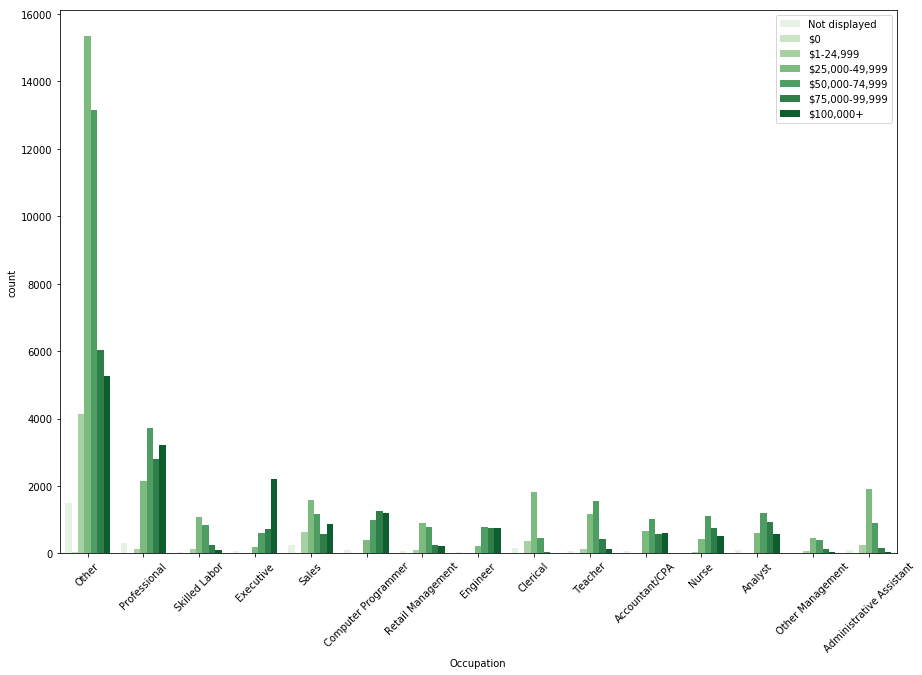

In [78]:
# plot count plot to see income range count by occupations
plt.figure(figsize=(15,10))
hue_order = ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.countplot(data = loan_df_copy.loc[:, ['Occupation', 'IncomeRange']], x = 'Occupation', hue='IncomeRange', dodge=True,
            palette='Greens', hue_order=hue_order)

plt.xticks(rotation=45)
plt.legend(loc=1)
plt.show();

As we can see Executives, Computer programmers and Engineers have highest share of borrowers with income 100,000+. It makes it logical for them to have lower APR compared to other proffessions.

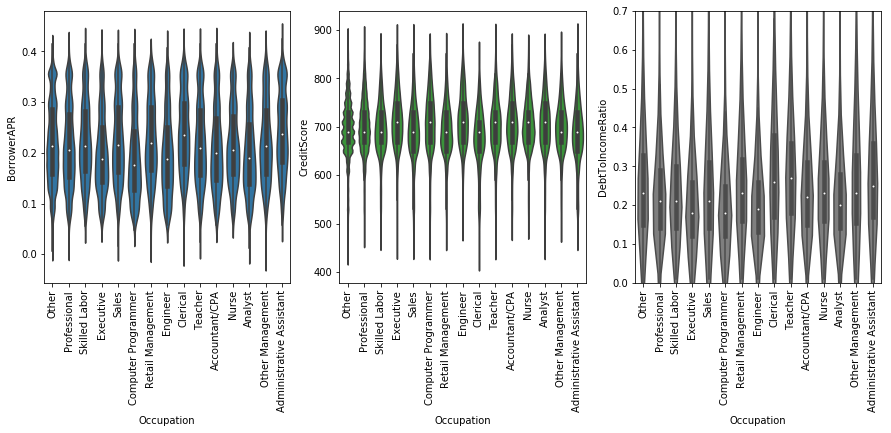

In [79]:
# plot categorical variables against APR and Creditscore
plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
sb.violinplot(data=loan_df_copy, x = 'Occupation', y='BorrowerAPR', color=sb.color_palette()[0])
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sb.violinplot(data=loan_df_copy, x = 'Occupation', y='CreditScore', color=sb.color_palette()[2])
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sb.violinplot(data=loan_df_copy, x = 'Occupation', y='DebtToIncomeRatio', color=sb.color_palette()[7])
plt.xticks(rotation=90)
plt.ylim(0, 0.7)

plt.show();

We can observe that higher credit score means lower apr, which is not suprising. Also, very interesting trend, occupations with lower APR also have lower Debt-to-Income ratio, meaning they carry less risk for lender and provide lesser APR.

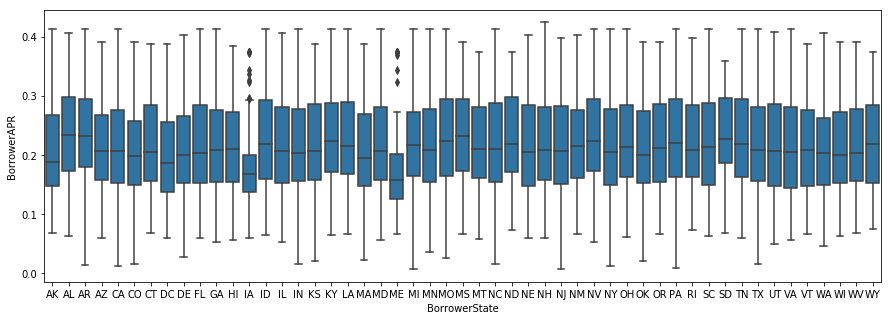

In [80]:
# plotting borrower apr by states
plt.figure(figsize=(15,5))
sb.boxplot(data=loan_df_copy, x='BorrowerState', y='BorrowerAPR', color=sb.color_palette()[0], 
           order=sorted(loan_df_copy.BorrowerState.unique()))
plt.show();

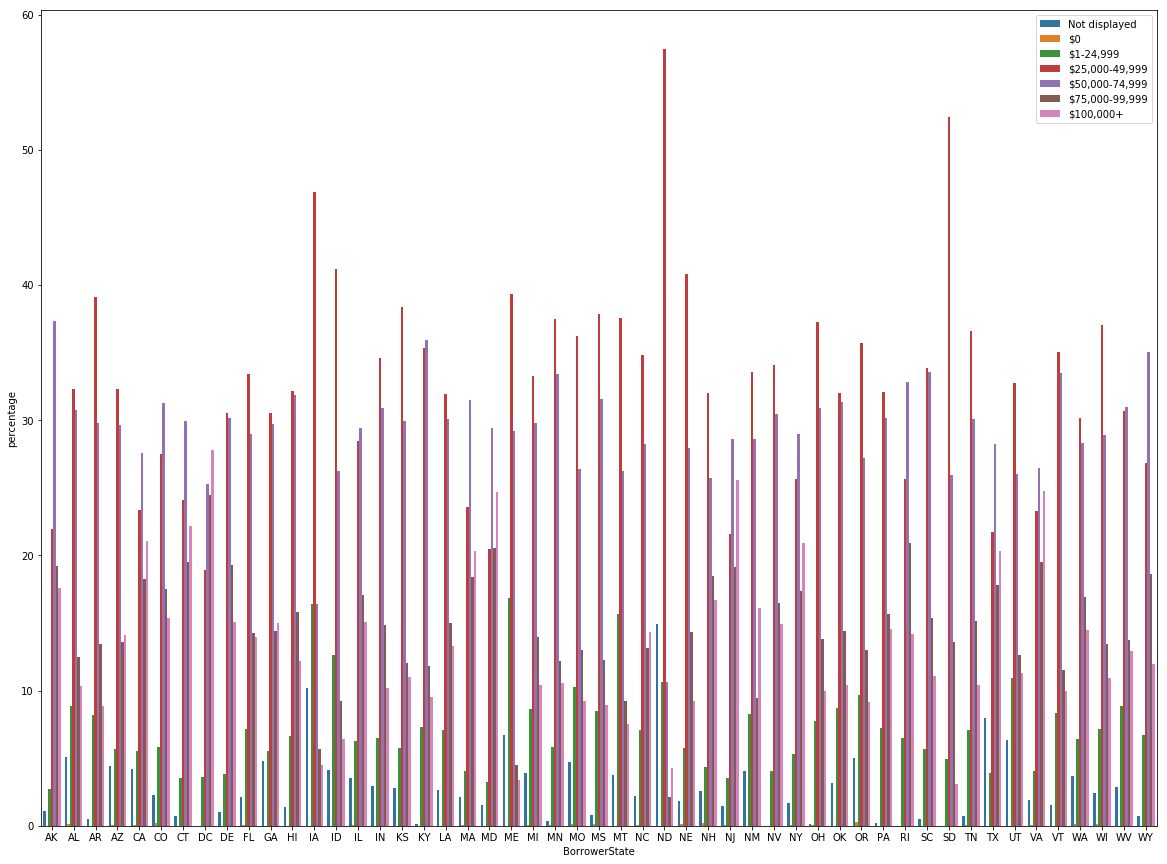

In [81]:
# plot normalized count plot of income range by borrowerstate
plt.figure(figsize=(20,15))
state_inc_counts = (loan_df_copy.groupby(['BorrowerState'])['IncomeRange']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('IncomeRange'))
g = sb.barplot(x="BorrowerState", y="percentage", hue="IncomeRange", data=state_inc_counts, hue_order=hue_order,
              order=sorted(loan_df_copy.BorrowerState.unique()))
#plt.setp(g.get_xticklabels(), rotation=90)  # Rotate labels
plt.legend(loc=1)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We observed very low correlation rates, which is surprising because term and Debt-to-Income ratio should have very obvious effect on APR. Strongest corellation that was observed was between APR and Credit score, which was still a bit less than 0.5. Nevertheless the direction of the corelations seemed logical. 
Also, analysis revelead occupations that had low APR. These occupations have also high income range, high credit score and low debt-to-income ratio.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Analysing income range by state reveales that regardless of which income range is prevelant, isn't showing connection with APR. Thus, in further analysis combining state and income range wouldn't make picture clearer, because it seems APR is affected by inner state monetary policies.

## Multivariate Exploration

In [82]:
# histogram shortcut
def hist2grid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = 50
    bins_y = 50
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin=0.5)

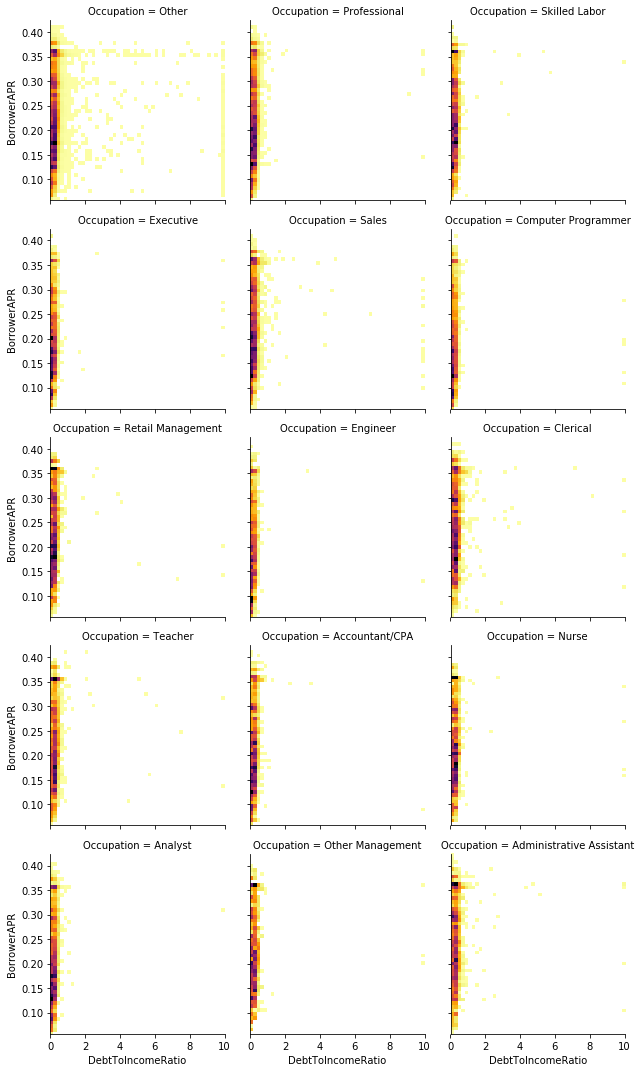

In [83]:
# investigate debt-to-income ratio, apr and occupation

g = sb.FacetGrid(data=loan_df_copy, col='Occupation', col_wrap=3, size=3)
g.map(hist2grid, 'DebtToIncomeRatio', 'BorrowerAPR', color='inferno_r')

plt.show();

As we observe, most of the values are under 1. Anything above is very rare. Will be more helpful to observe below or equal to 1.

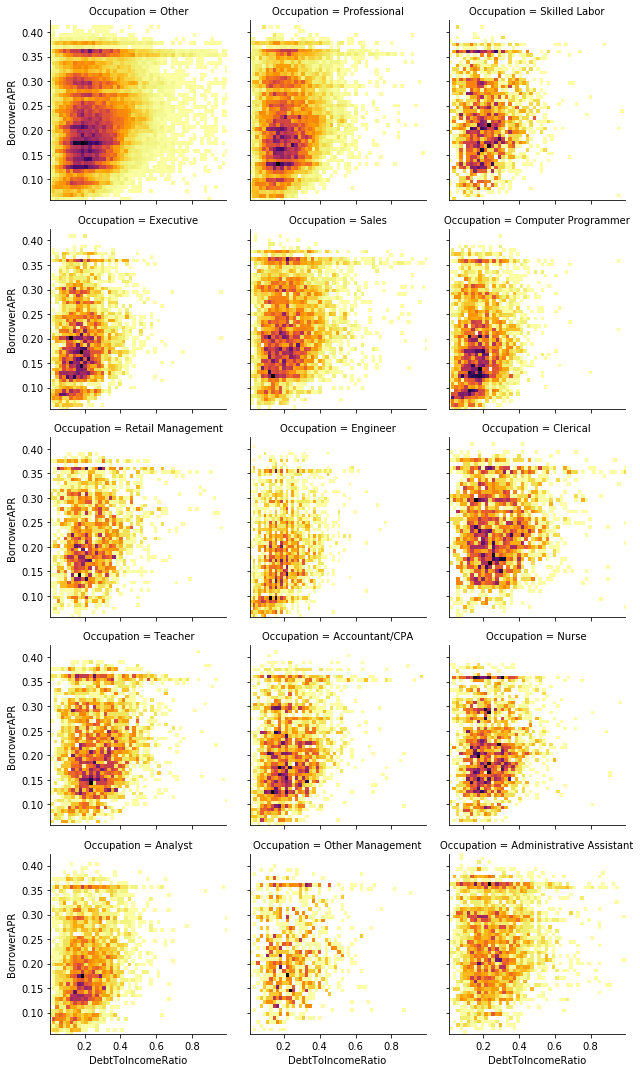

In [84]:
# investigate debt-to-income ratio <= 1, apr and occupation
g = sb.FacetGrid(data=loan_df_copy[loan_df_copy.DebtToIncomeRatio <= 1], col='Occupation', col_wrap=3)
g.map(hist2grid, 'DebtToIncomeRatio', 'BorrowerAPR', color='inferno_r')

plt.show();

We will do same plotting to compare apr, debt-to-income and income range features.

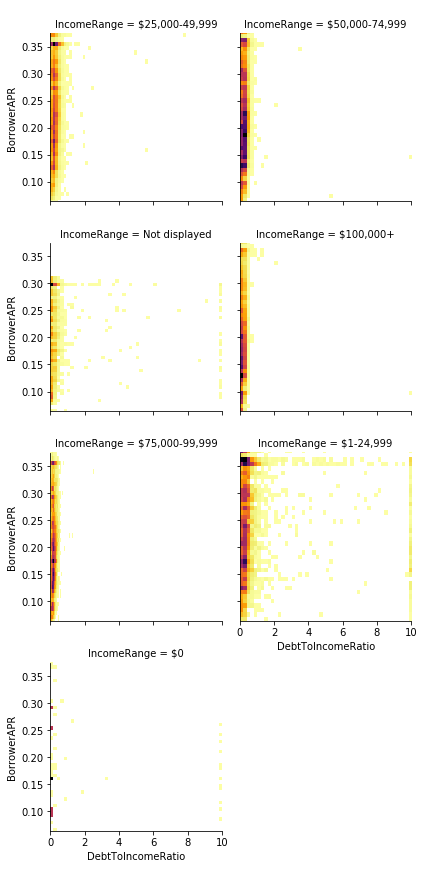

In [85]:
# investigate income range, apr and credit score
g = sb.FacetGrid(data=loan_df_copy, col='IncomeRange', col_wrap=2, size=3)
g.map(hist2grid, 'DebtToIncomeRatio', 'BorrowerAPR', color='inferno_r')

plt.show();

We caught an interesting pattern, low income range borrowers have majority of high debt-to-income ratio. This is another interesting subject for future researches. 

here as well, we will need to limit debt-to-income ratio to 1, to see picture clearly.

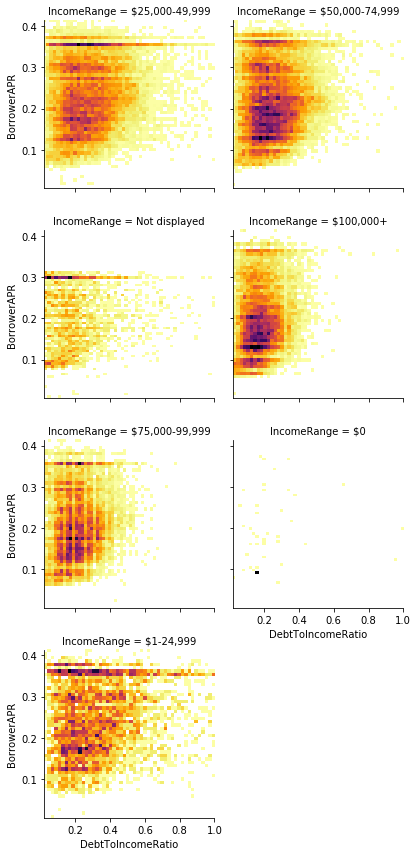

In [86]:
# investigate income range, apr and credit score
g = sb.FacetGrid(data=loan_df_copy[loan_df_copy.DebtToIncomeRatio <= 1], col='IncomeRange', col_wrap=2, size=3)
g.map(hist2grid, 'DebtToIncomeRatio', 'BorrowerAPR', color='inferno_r')

plt.show();

Overall we can observe dark clouds forming on lower left side of the graphs in most cases. This pattern is more observable in income range comparison rather than occupation. Although we can observe that executives and computer programers have well defined concetration of clouds on lower left end, there is also case of category `Other`, which hold majority of the values and is impossible to draw conclusions from it. In the rest of the occupation categories the pattern is less obvious. Although, we can observe more clearer patern in case of income range. The higher the income more visible is cloud on lower left corner.

For further analysis need to observe combination of APR, occupation and income range.

In [87]:
# function for customising boxplot
def box(x, y, **kwgs):
    pallete = kwgs.pop('color')
    sb.violinplot(x=x, y=y, palette='Blues', order=hue_order)

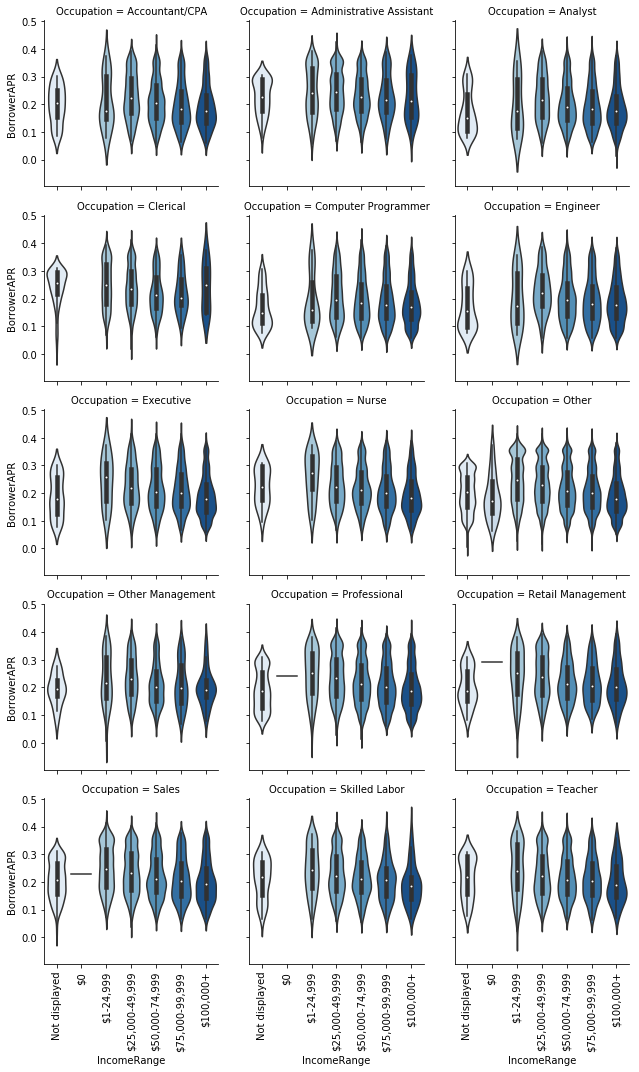

In [88]:
# plot facetgrid of boxplots for occupation, income range and apr
# source https://newbedev.com/seaborn-countplot-with-normalized-y-axis-per-group
ordered_occupation = sorted(loan_df_copy.Occupation.unique())

g = sb.FacetGrid(data=loan_df_copy, col='Occupation', col_order=ordered_occupation, col_wrap=3, size=3)
g.map(box, 'IncomeRange', 'BorrowerAPR')
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show();

We can observe clear pattern, that the higher the income, the lower APR goes. Although, we can observe outliner occasions, where for certain occupations median APR is lower for 1-24,999 range rather than 100,000+. Such occupations are accountant, engineer, analyst and computer programer.

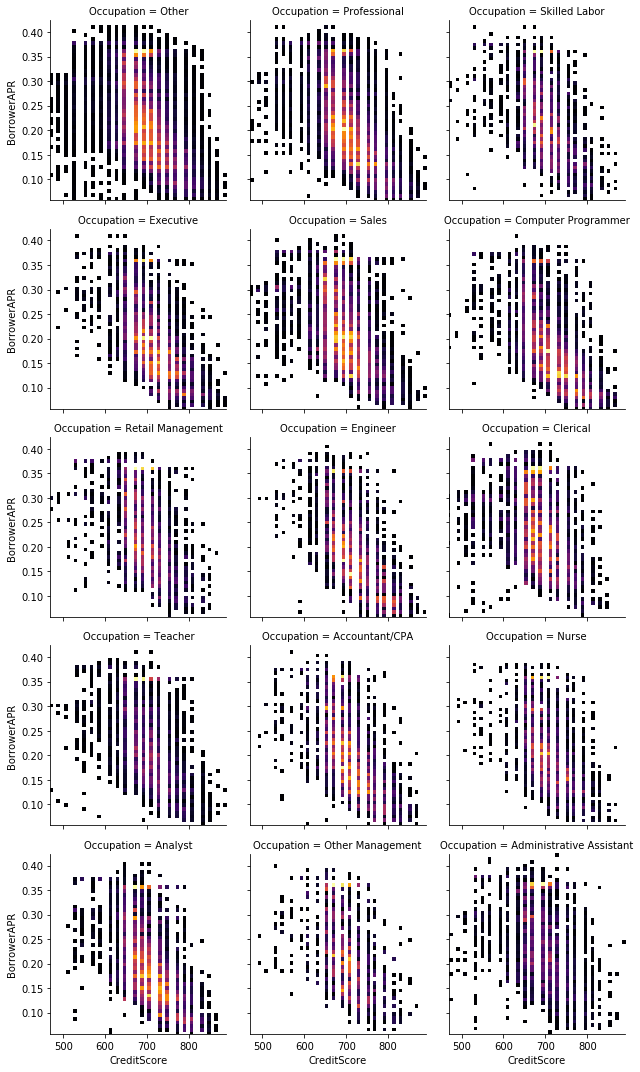

In [89]:
# investigate debt-to-income ratio, apr and occupation

g = sb.FacetGrid(data=loan_df_copy, col='Occupation', col_wrap=3, size=3)
g.map(hist2grid, 'CreditScore', 'BorrowerAPR', color="inferno")

plt.show();

In [90]:
# group by occupation and use medians

loan_df_median = loan_df_copy.groupby('Occupation', as_index=False).median()

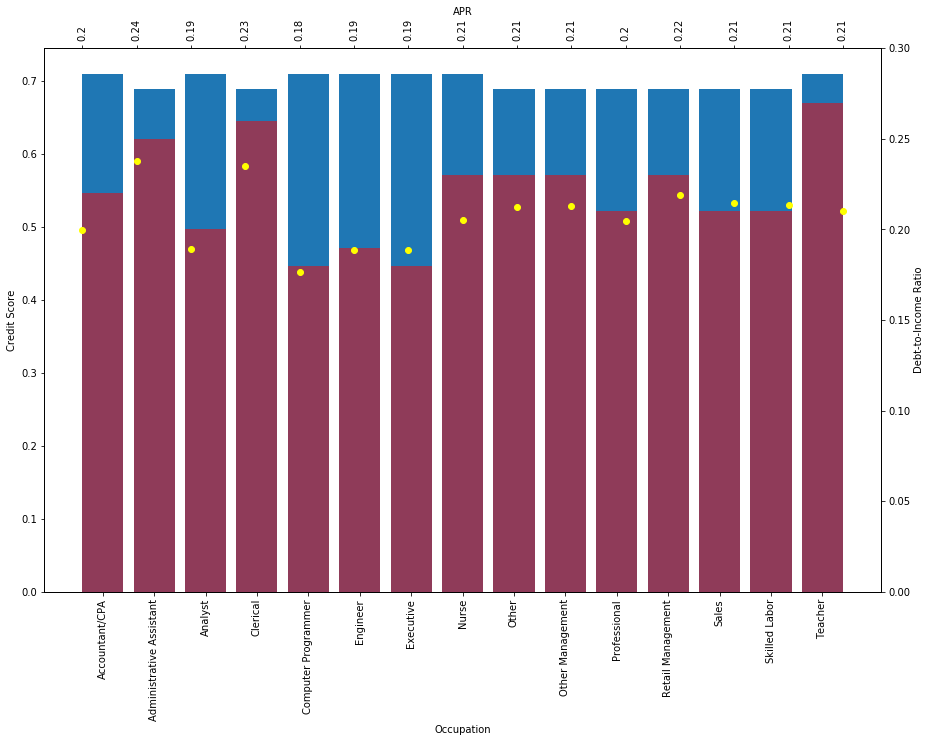

In [91]:
# graphin apr, occupation, debt to income ratio and creditscore
# for scalability divided credit score by 1,000
plt.figure(figsize=(15,10))

plt.bar(x=loan_df_median['Occupation'], height=loan_df_median['CreditScore']/1000)
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Credit Score')


plt.twinx()
plt.bar(x=loan_df_median['Occupation'], height=loan_df_median['DebtToIncomeRatio'], color='red', alpha = 0.5)
plt.ylim(0,0.30)
plt.ylabel('Debt-to-Income Ratio')

plt.twiny()
plt.scatter(x=loan_df_median['Occupation'], y=loan_df_median['BorrowerAPR'], color='yellow')
plt.xticks(loan_df_median['Occupation'].tolist(), round(loan_df_median['BorrowerAPR'],2).tolist(), rotation=90)
plt.xlabel('APR')

plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We can obsserve strong relationship between occupation, income range, debt to income ratio and creditscore. The connection with creditscore was obvious, it is influenced by income and debt to income ratio. In all observations the pattern over all is similar, high income and creditscore, low debt to income ratio means lower apr.

### Were there any interesting or surprising interactions between features?

When we observe interaction between income range and apr by occupations, in some cases apr is lower on low income range rather than high income range. Such occupations are accountant, engineer, analyst and computer programer. This is out of ordinary and would require farther investigation.

## Conclusions

Observations revealed, main determinanat of apr is income range, debt to income ratio and credit score. Occupations that have lowest median apr are engineers, executives, computer programers and analysts, because they have highest income range and lowest debt to income ratio with high credit score. But it doesn't mean that only profession will decide apr. Maintaining low debt to income ratio and high credit score will have influence on apr, might not become as low as for above mentioned professions, but can be observed it can be lowered. 

In [94]:
# save wrangled data
loan_df_copy.to_csv('LoanDataEnhanced.csv', index_label=False)